In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

In [5]:
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


## Data Visualization & Exploration

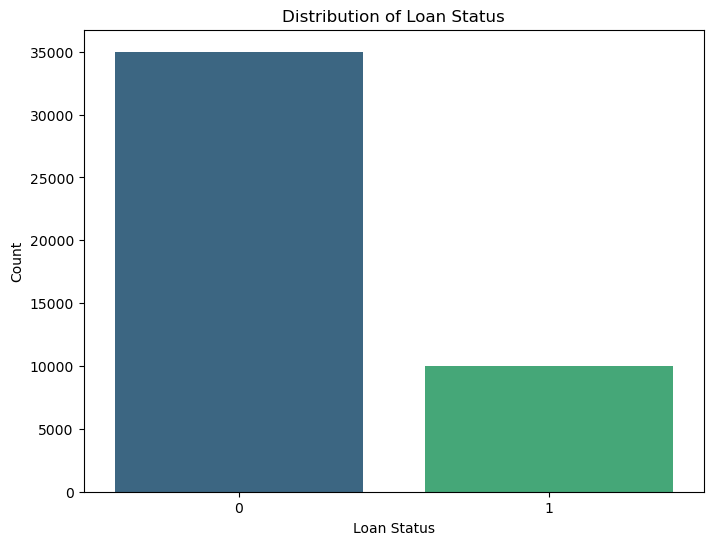

In [6]:
# Distribution of Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status', palette='viridis')
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Distribution of Loan Status")
plt.show()

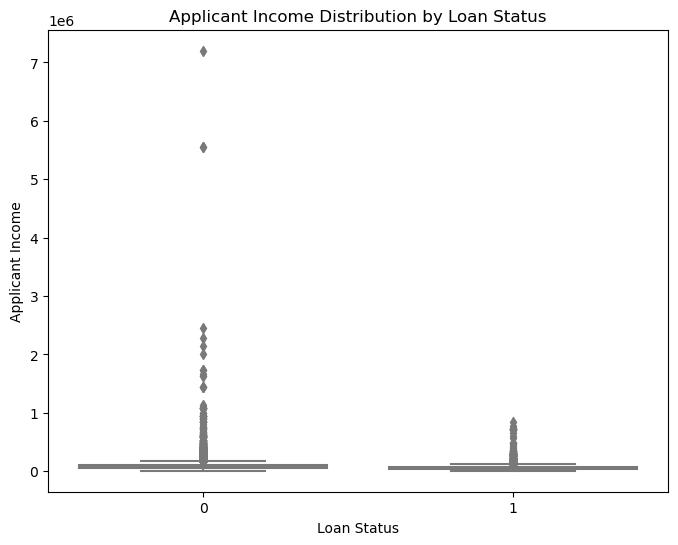

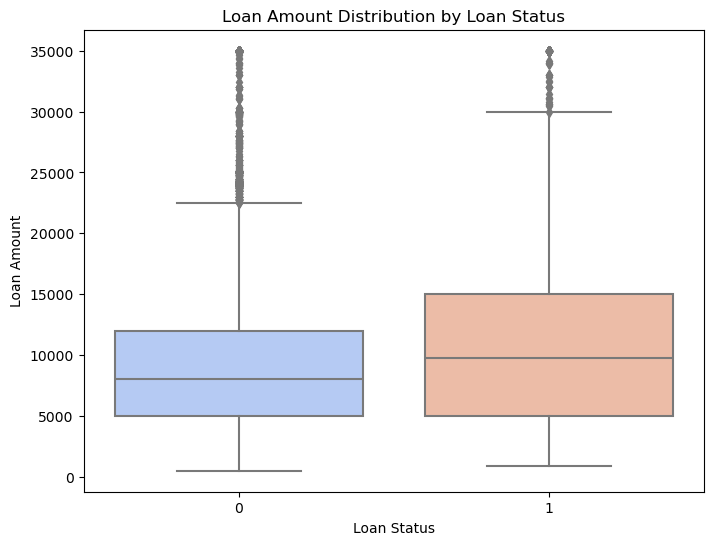

In [7]:
# Distribution of ApplicantIncome by Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='person_income', palette='coolwarm')
plt.xlabel("Loan Status")
plt.ylabel("Applicant Income")
plt.title("Applicant Income Distribution by Loan Status")
plt.show()

# Distribution of LoanAmount by Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='loan_amnt', palette='coolwarm')
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Loan Amount Distribution by Loan Status")
plt.show()


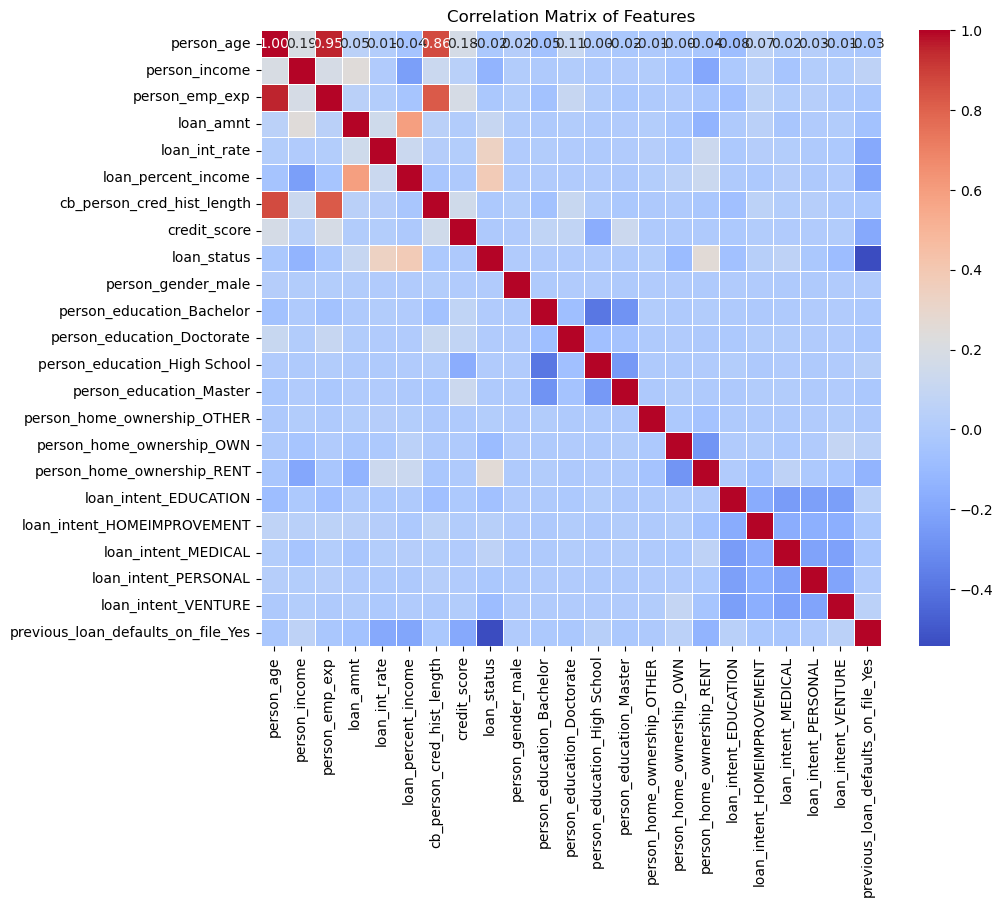

In [8]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


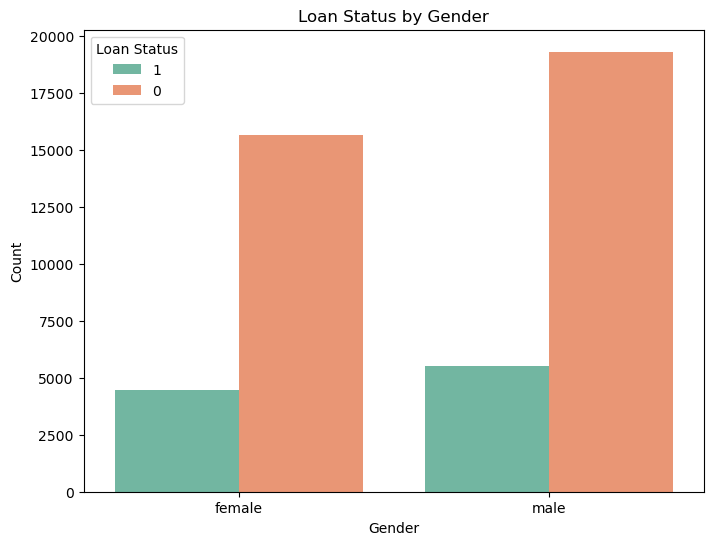

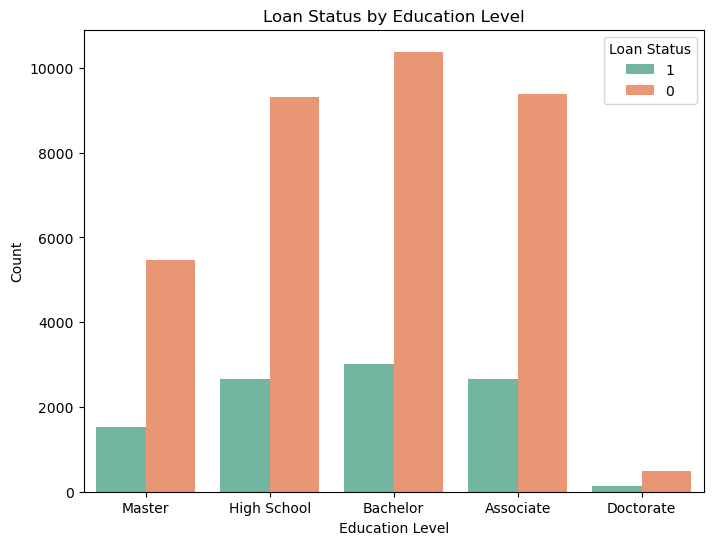

In [9]:
# Convert categorical columns to string types for plotting
df['loan_status'] = df['loan_status'].astype(str)
df['person_gender'] = df['person_gender'].astype(str)
df['person_education'] = df['person_education'].astype(str)
df['person_age'] = df['person_age'].astype(str)


# Plotting Loan Status by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='person_gender', hue='loan_status', palette='Set2')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Loan Status by Gender")
plt.legend(title="Loan Status")
plt.show()

# Plotting Loan Status by Education
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='person_education', hue='loan_status', palette='Set2')
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Loan Status by Education Level")
plt.legend(title="Loan Status")
plt.show()



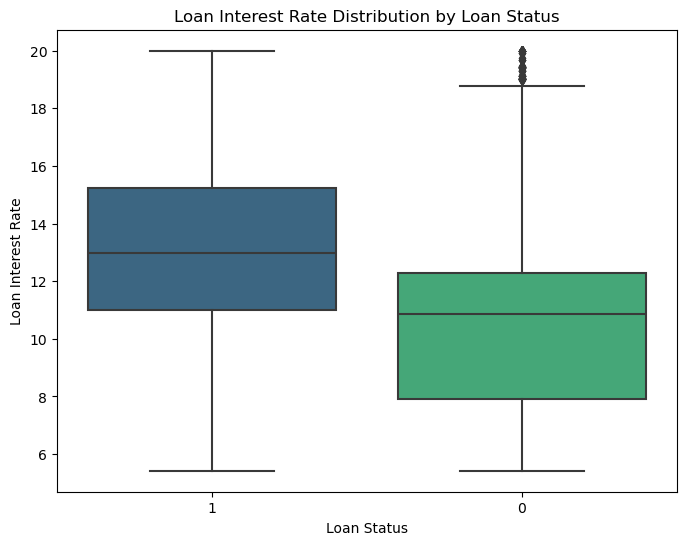

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='loan_int_rate', palette='viridis')
plt.xlabel("Loan Status")
plt.ylabel("Loan Interest Rate")
plt.title("Loan Interest Rate Distribution by Loan Status")
plt.show()


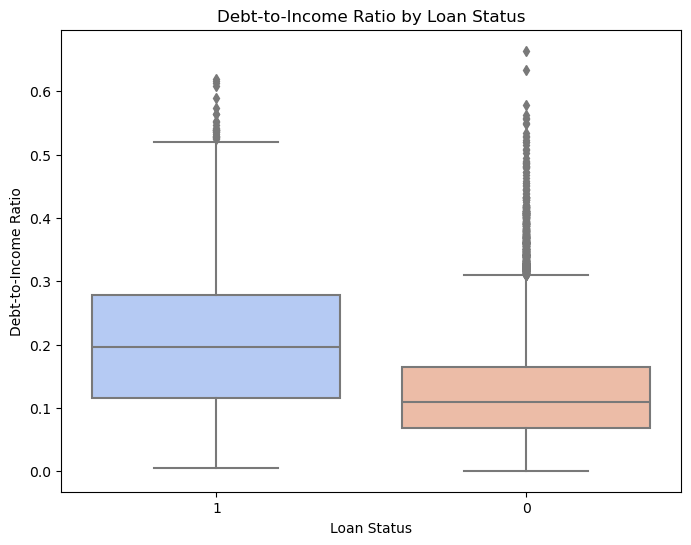

In [9]:
df['debt_to_income'] = df['loan_amnt'] / df['person_income']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='debt_to_income', palette='coolwarm')
plt.xlabel("Loan Status")
plt.ylabel("Debt-to-Income Ratio")
plt.title("Debt-to-Income Ratio by Loan Status")
plt.show()


### Loan Approval Analysis: Income and Loan Amount Distribution

#### 1. Log-Transformed Applicant Income by Loan Status
- **Visualization**: A violin plot displays the log-transformed income distribution for approved (`1`) and denied (`0`) loans.
- **Insights**:
  - Approved loans (`1`) show a slightly **higher median income** compared to denied loans (`0`).
  - Denied loans have a **wider income spread**, indicating more diverse financial situations.
  - The log transformation reduces skewness, providing a clearer comparison of income distributions.

#### 2. Loan Amount Distribution by Loan Status
- **Visualization**: A box plot compares the loan amount distributions for approved and denied loans.
- **Insights**:
  - Approved loans (`1`) generally have **higher median loan amounts**.
  - Both groups exhibit high variability in loan amounts, with approved loans clustering around higher values.
  - Outliers indicate some applicants requested significantly larger loans, irrespective of approval status.

#### Summary
- **Income and Loan Approval**: Higher income is associated with approved loans, but overlaps suggest other factors also play key roles.
- **Loan Amounts**: Approved loans are linked to higher requested amounts, yet distribution overlaps highlight the complexity of approval decisions.
- These insights offer valuable patterns for understanding loan approval criteria and guiding predictive modeling.


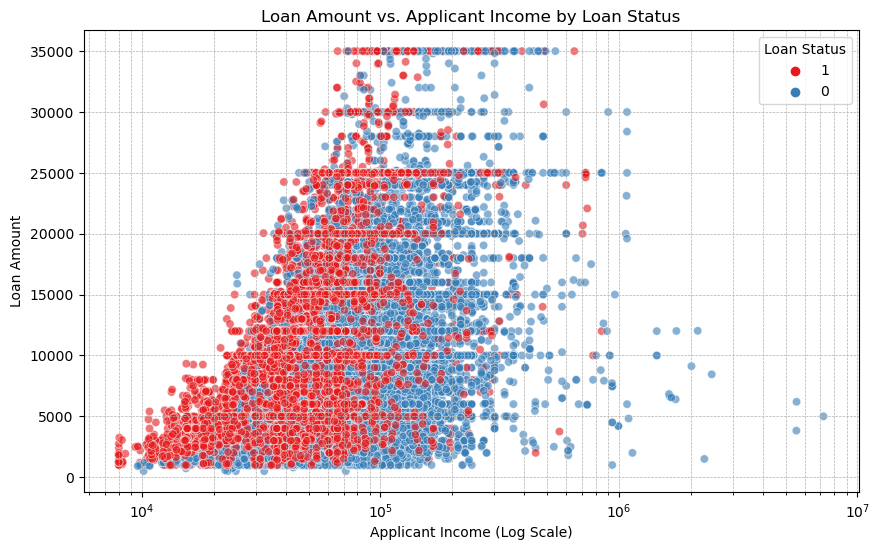

In [10]:
plt.figure(figsize=(10, 6))

# Apply logarithmic scale to spread out values on the x-axis
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_status', palette='Set1', alpha=0.6)

# Set logarithmic scale for x-axis
plt.xscale('log')
plt.xlabel("Applicant Income (Log Scale)")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs. Applicant Income by Loan Status")
plt.legend(title="Loan Status")
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


### Loan Amount vs. Applicant Income by Loan Status

#### Visualization
- A scatter plot illustrates the relationship between **applicant income (log scale)** and **loan amount**, categorized by **loan status**:
  - **Red (1)**: Approved loans.
  - **Blue (0)**: Denied loans.

#### Insights
- **General Trend**:
  - Loan amounts generally increase with higher applicant income.
  - Approved loans (red) dominate in higher income ranges, indicating income as a critical factor in loan approval.

- **Denied Loans (Blue)**:
  - Clustered primarily in the lower to mid-income range.
  - Suggests stricter loan approval criteria for applicants with lower income levels.

- **Approved Loans (Red)**:
  - Spread more evenly across a broader range of incomes.
  - Includes a notable concentration of higher loan amounts tied to higher incomes.

#### Summary
This scatter plot provides clear evidence of the strong relationship between applicant income and loan approval decisions. Higher incomes are associated with both greater loan amounts and higher approval rates, emphasizing the importance of income in loan underwriting processes.


## Data Pre-processing

In [10]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  object 
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [12]:
df.describe()

,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
count,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756
std,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865
min,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000
25%,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000
50%,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000
75%,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000
max,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000


In [13]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [14]:
df['person_age'].value_counts()

person_age
23.0     5254
24.0     5138
25.0     4507
22.0     4236
26.0     3659
27.0     3095
28.0     2728
29.0     2455
30.0     2021
31.0     1645
32.0     1403
21.0     1289
33.0     1240
34.0      980
35.0      847
36.0      740
37.0      666
38.0      503
39.0      389
40.0      349
41.0      303
42.0      247
43.0      215
44.0      177
45.0      135
46.0      114
47.0      112
48.0       93
49.0       59
50.0       56
51.0       46
52.0       42
53.0       35
54.0       24
55.0       24
58.0       20
56.0       20
57.0       17
20.0       17
60.0       16
61.0       12
66.0       11
65.0       10
70.0        7
64.0        7
62.0        7
59.0        6
69.0        5
144.0       3
73.0        3
63.0        3
123.0       2
78.0        1
94.0        1
80.0        1
84.0        1
76.0        1
67.0        1
116.0       1
109.0       1
Name: count, dtype: int64

In [15]:
df['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [16]:
# Encoding gender with 0 and 1
df['person_gender'] = df['person_gender'].map({'male': 1, 'female': 0})

In [17]:
df['person_gender'].value_counts()

person_gender
1    24841
0    20159
Name: count, dtype: int64

In [18]:
df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [19]:
df['person_education'].nunique()

5

In [20]:
education_rank = {
    'High School' : 1,
    'Associate' : 2,
    'Bachelor' : 3,
    'Master' : 4,
    'Doctorate' : 5,
}

df['person_education'] = df['person_education'].map(education_rank)

In [21]:
df['person_education'].value_counts()

person_education
3    13399
2    12028
1    11972
4     6980
5      621
Name: count, dtype: int64

In [22]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,0,1,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,0,1,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,0,3,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,1,4,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,0,2,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,1,2,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,1,3,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [23]:
df['person_emp_exp'].nunique()

63

In [24]:
df['loan_intent'].nunique()

6

In [25]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [26]:
# ONE HOT ENCODING for the loan intent.
df = pd.get_dummies(df, columns=['loan_intent'], prefix='intent', drop_first=False)

# Convert only the new columns to integers if necessary
one_hot_columns = [col for col in df.columns if col.startswith('intent_')]
df[one_hot_columns] = df[one_hot_columns].astype(int)

In [27]:
# Convert 'True'/'False' values in intent columns to 0 and 1
intent_columns = [col for col in df.columns if col.startswith('intent_')]
df[intent_columns] = df[intent_columns].astype(int)

In [28]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
0,22.0,0,4,71948.0,0,RENT,35000.0,16.02,0.49,3.0,561,No,1,0,0,0,0,1,0
1,21.0,0,1,12282.0,0,OWN,1000.0,11.14,0.08,2.0,504,Yes,0,0,1,0,0,0,0
2,25.0,0,1,12438.0,3,MORTGAGE,5500.0,12.87,0.44,3.0,635,No,1,0,0,0,1,0,0
3,23.0,0,3,79753.0,0,RENT,35000.0,15.23,0.44,2.0,675,No,1,0,0,0,1,0,0
4,24.0,1,4,66135.0,1,RENT,35000.0,14.27,0.53,4.0,586,No,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2,47971.0,6,RENT,15000.0,15.66,0.31,3.0,645,No,1,0,0,0,1,0,0
44996,37.0,0,2,65800.0,17,RENT,9000.0,14.07,0.14,11.0,621,No,1,0,0,1,0,0,0
44997,33.0,1,2,56942.0,7,RENT,2771.0,10.02,0.05,10.0,668,No,1,1,0,0,0,0,0
44998,29.0,1,3,33164.0,4,RENT,12000.0,13.23,0.36,6.0,604,No,1,0,1,0,0,0,0


In [29]:
df['person_home_ownership'].nunique()

4

In [30]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [31]:
# ONE HOT ENCODE
df = pd.get_dummies(df, columns=['person_home_ownership'], prefix='home', drop_first=False)

In [32]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE,home_MORTGAGE,home_OTHER,home_OWN,home_RENT
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,...,0,0,0,0,1,0,False,False,False,True
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,...,0,1,0,0,0,0,False,False,True,False
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,...,0,0,0,1,0,0,True,False,False,False
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,...,0,0,0,1,0,0,False,False,False,True
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,...,0,0,0,1,0,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2,47971.0,6,15000.0,15.66,0.31,3.0,645,...,0,0,0,1,0,0,False,False,False,True
44996,37.0,0,2,65800.0,17,9000.0,14.07,0.14,11.0,621,...,0,0,1,0,0,0,False,False,False,True
44997,33.0,1,2,56942.0,7,2771.0,10.02,0.05,10.0,668,...,1,0,0,0,0,0,False,False,False,True
44998,29.0,1,3,33164.0,4,12000.0,13.23,0.36,6.0,604,...,0,1,0,0,0,0,False,False,False,True


In [33]:
intent_columns = [col for col in df.columns if col.startswith('home')]
df[intent_columns] = df[intent_columns].astype(int)

In [34]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE,home_MORTGAGE,home_OTHER,home_OWN,home_RENT
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,...,0,0,0,0,1,0,0,0,0,1
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,...,0,1,0,0,0,0,0,0,1,0
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,...,0,0,0,1,0,0,1,0,0,0
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,...,0,0,0,1,0,0,0,0,0,1
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2,47971.0,6,15000.0,15.66,0.31,3.0,645,...,0,0,0,1,0,0,0,0,0,1
44996,37.0,0,2,65800.0,17,9000.0,14.07,0.14,11.0,621,...,0,0,1,0,0,0,0,0,0,1
44997,33.0,1,2,56942.0,7,2771.0,10.02,0.05,10.0,668,...,1,0,0,0,0,0,0,0,0,1
44998,29.0,1,3,33164.0,4,12000.0,13.23,0.36,6.0,604,...,0,1,0,0,0,0,0,0,0,1


In [35]:
df['loan_amnt'].describe()

count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64

In [36]:
df['loan_int_rate'].describe()

count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64

In [37]:
df['loan_percent_income'].describe()

count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64

In [38]:
df['cb_person_cred_hist_length'].describe()

count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

In [39]:
df['credit_score'].describe()

count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64

In [40]:
df['previous_loan_defaults_on_file'].nunique()

2

In [41]:
df['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

In [42]:
df['previous_loan_defaults_on_file'] = df[
    'previous_loan_defaults_on_file'
].map({'Yes': 1, 'No': 0})

In [43]:
df['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
1    22858
0    22142
Name: count, dtype: int64

In [44]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE,home_MORTGAGE,home_OTHER,home_OWN,home_RENT
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,...,0,0,0,0,1,0,0,0,0,1
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,...,0,1,0,0,0,0,0,0,1,0
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,...,0,0,0,1,0,0,1,0,0,0
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,...,0,0,0,1,0,0,0,0,0,1
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2,47971.0,6,15000.0,15.66,0.31,3.0,645,...,0,0,0,1,0,0,0,0,0,1
44996,37.0,0,2,65800.0,17,9000.0,14.07,0.14,11.0,621,...,0,0,1,0,0,0,0,0,0,1
44997,33.0,1,2,56942.0,7,2771.0,10.02,0.05,10.0,668,...,1,0,0,0,0,0,0,0,0,1
44998,29.0,1,3,33164.0,4,12000.0,13.23,0.36,6.0,604,...,0,1,0,0,0,0,0,0,0,1


## Models

In [45]:
X = df.drop(columns=['loan_status'])
X

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE,home_MORTGAGE,home_OTHER,home_OWN,home_RENT
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,...,0,0,0,0,1,0,0,0,0,1
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,...,0,1,0,0,0,0,0,0,1,0
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,...,0,0,0,1,0,0,1,0,0,0
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,...,0,0,0,1,0,0,0,0,0,1
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,2,47971.0,6,15000.0,15.66,0.31,3.0,645,...,0,0,0,1,0,0,0,0,0,1
44996,37.0,0,2,65800.0,17,9000.0,14.07,0.14,11.0,621,...,0,0,1,0,0,0,0,0,0,1
44997,33.0,1,2,56942.0,7,2771.0,10.02,0.05,10.0,668,...,1,0,0,0,0,0,0,0,0,1
44998,29.0,1,3,33164.0,4,12000.0,13.23,0.36,6.0,604,...,0,1,0,0,0,0,0,0,0,1


In [46]:
y = df['loan_status']
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: object

In [47]:
print(f'X_shape = {X.shape}')
print(f'y_shape = {y.shape}')

X_shape = (45000, 21)
y_shape = (45000,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [49]:
dtc = DecisionTreeClassifier(random_state=42)

param_grid_dtc = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 50, 100],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50, 100, 200],
    'ccp_alpha': np.linspace(0, 0.1, 10)
}


random_search_dtc = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=param_grid_dtc,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search_dtc.fit(X_train, y_train)

print(f'Best Params for DT Classifier: {random_search_dtc.best_params_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params for DT Classifier: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_leaf_nodes': 200, 'max_features': None, 'max_depth': 50, 'criterion': 'gini', 'ccp_alpha': 0.0}


In [50]:
best_dtc = random_search_dtc.best_estimator_

y_pred = best_dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_dtc*100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 91.68%
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6990
           1       0.84      0.77      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.89      0.86      0.88      9000
weighted avg       0.91      0.92      0.92      9000



### Decision Tree Classifier Performance Report

#### Best Hyperparameters
- **Criterion**: Gini
- **Max Depth**: 50
- **Max Features**: None
- **Max Leaf Nodes**: 200
- **Min Samples Split**: 2
- **Min Samples Leaf**: 20
- **Splitter**: Best
- **CCP Alpha**: 0.0

#### Performance Metrics
- **Accuracy**: **91.69%**

#### Classification Report
| Metric        | Class 0 (Denied Loans) | Class 1 (Approved Loans) | Macro Avg | Weighted Avg |
|---------------|-------------------------|---------------------------|-----------|--------------|
| **Precision** | 94%                    | 85%                      | 89%       | 92%          |
| **Recall**    | 96%                    | 77%                      | 86%       | 92%          |
| **F1-Score**  | 95%                    | 81%                      | 88%       | 92%          |
| **Support**   | 6990                   | 2010                     | -         | -            |

#### Insights
- **High Accuracy**: The model achieves a high accuracy of **91.69%**, demonstrating its effectiveness in predicting loan statuses.
- **Precision and Recall**:
  - **Class 0 (Denied Loans)**: High precision (94%) and recall (96%) indicate strong performance in correctly identifying denied loans.
  - **Class 1 (Approved Loans)**: Slightly lower precision (85%) and recall (77%), suggesting room for improvement in correctly identifying approved loans.
- **Imbalance Handling**: The performance metrics suggest the model performs well despite the class imbalance (6990 denied vs. 2010 approved loans).

#### Summary
The Decision Tree Classifier shows strong overall performance with precise and reliable predictions for denied loans. However, recall for approved loans could be improved, possibly by tuning the model further or experimenting with balancing techniques.


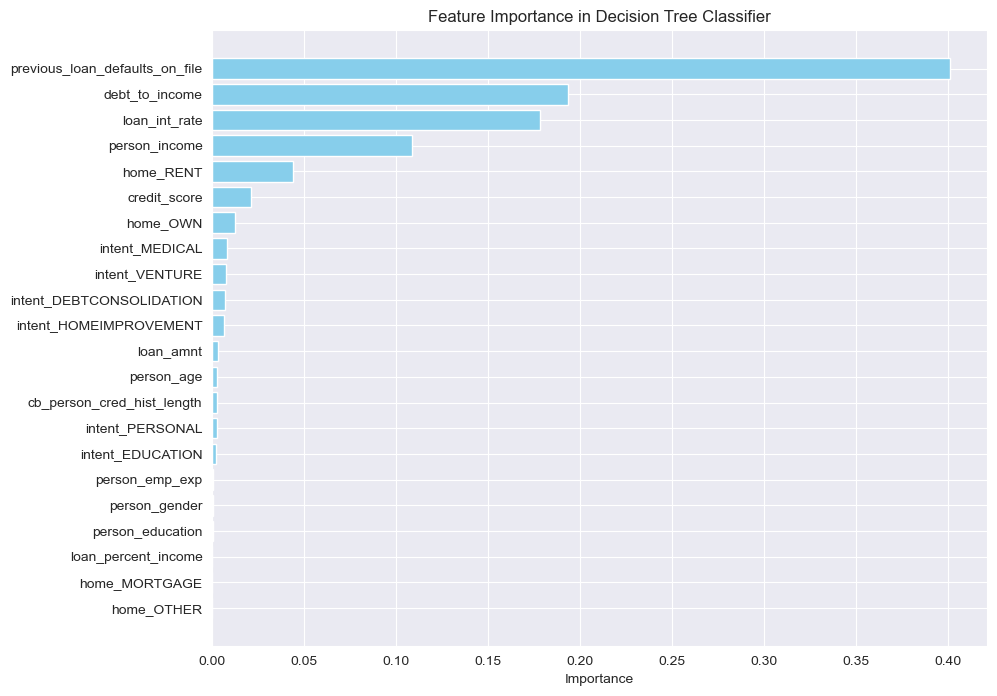

In [51]:
# Feature Importance for the Decision Tree Classifier

feature_importances = best_dtc.feature_importances_
features = X_train.columns  # Assuming X_train has the feature names

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()

### Feature Importance in Decision Tree Classifier

The bar chart above illustrates the feature importance derived from the Decision Tree Classifier model. This metric indicates how much each feature contributes to the model's predictive power.

#### Key Insights:
- **Top Influencers**:
  - **`previous_loan_defaults_on_file`**: This feature has the highest importance, indicating that the history of previous loan defaults significantly affects loan approval decisions.
  - **`debt_to_income`**: A critical factor, highlighting the applicant's ability to manage their debt relative to their income.
  - **`loan_int_rate`**: The interest rate of the loan plays a notable role in determining loan approval outcomes.
  - **`person_income`**: Applicant income is another important factor influencing loan decisions.

- **Less Significant Features**:
  - Features such as **`home_OWN`**, **`intent_EDUCATION`**, and **`person_gender`** show relatively low importance, suggesting they have a minimal impact on the model's predictions.

#### Implications:
- The model heavily relies on financial metrics, such as loan history and debt management, to predict loan status.
- Socio-demographic features, like **education level** and **gender**, appear to have less impact on loan approval decisions, aligning with fair lending practices.

This analysis provides valuable insights into how various factors influence loan decisions and could guide efforts to improve credit risk modeling.

## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize AdaBoost Classifier with a DecisionTreeClassifier as the base estimator
abc = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    random_state=42
)

# Define the parameter grid for AdaBoost
param_grid_abc = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 1.5],
    'base_estimator__max_depth': [1, 2, 3, 5, 10],
    'base_estimator__min_samples_split': [2, 5, 10, 20],
    'base_estimator__min_samples_leaf': [1, 2, 5, 10]
}

# Initialize RandomizedSearchCV
random_search_abc = RandomizedSearchCV(
    estimator=abc,
    param_distributions=param_grid_abc,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the model
random_search_abc.fit(X_train, y_train)

# Output the best parameters
print(f'Best Params for AdaBoost Classifier: {random_search_abc.best_params_}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Matan Nafshi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Params for AdaBoost Classifier: {'n_estimators': 500, 'learning_rate': 0.1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_samples_leaf': 10, 'base_estimator__max_depth': 3}


In [55]:
best_abc = random_search_abc.best_estimator_

y_pred = best_abc.predict(X_test)

accuracy_abc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_abc*100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 93.12%
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.79      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



### AdaBoost Classifier Results

The AdaBoost model was evaluated on the test dataset, achieving the following performance metrics:

#### Accuracy:
- **Accuracy**: The model achieved an overall accuracy of **93.12%**, indicating a high level of precision in predicting loan approval status.

#### Classification Report:
| Metric           | Class 0 (Rejected Loans) | Class 1 (Approved Loans) | Macro Average | Weighted Average |
|------------------|--------------------------|--------------------------|---------------|------------------|
| **Precision**    | 94%                      | 89%                      | 92%           | 93%              |
| **Recall**       | 97%                      | 79%                      | 88%           | 93%              |
| **F1-Score**     | 96%                      | 84%                      | 90%           | 93%              |
| **Support**      | 6990                     | 2010                     | 9000          | 9000             |

#### Insights:
1. **Class 0 (Rejected Loans)**: 
   - Precision: 94% of loans predicted as "Rejected" were correct.
   - Recall: 97% of actual "Rejected" loans were identified correctly.
   - F1-Score: 96%, indicating balanced performance between precision and recall.

2. **Class 1 (Approved Loans)**:
   - Precision: 89% of loans predicted as "Approved" were correct.
   - Recall: 79% of actual "Approved" loans were identified correctly.
   - F1-Score: 84%, slightly lower due to reduced recall.

3. **Overall Performance**:
   - The model performs exceptionally well for "Rejected Loans" (Class 0), but has slightly reduced recall for "Approved Loans" (Class 1), which suggests some approved loans may be misclassified as rejected.

The model demonstrates robust performance, especially in identifying rejected loans, making it suitable for applications where minimizing false approvals is crucial.


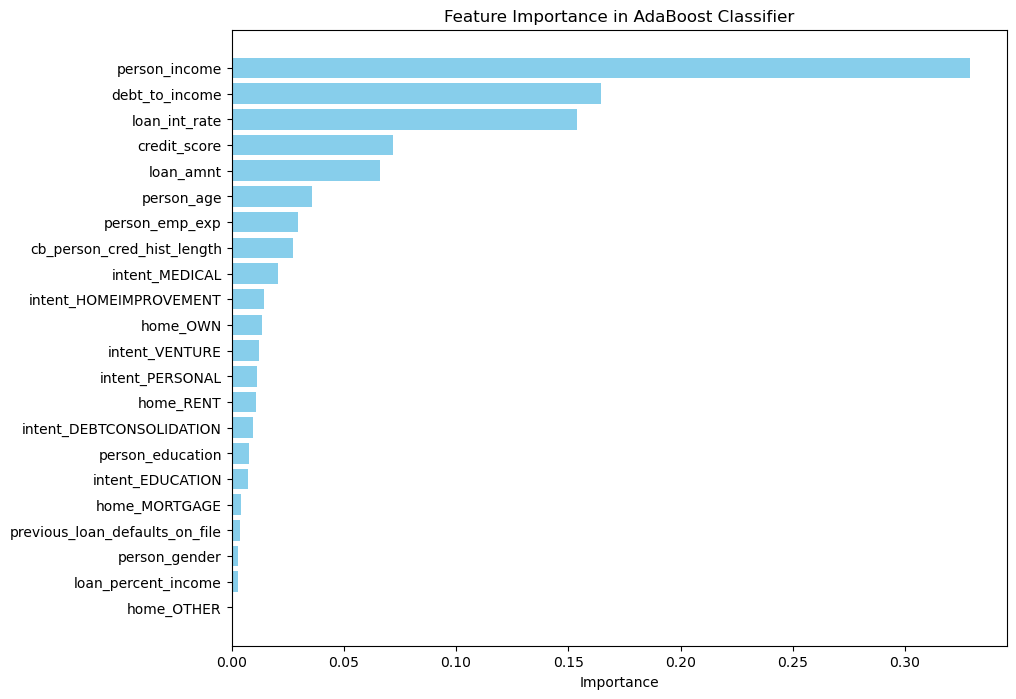

In [56]:
# Feature Importance for the AdaBoost Classifier

# Extract feature importances from the best AdaBoost estimator
feature_importances = best_abc.feature_importances_
features = X_train.columns  # Assuming X_train has the feature names

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in AdaBoost Classifier')
plt.show()


### Feature Importance in AdaBoost Classifier

The AdaBoost model was analyzed for feature importance, highlighting the most influential variables in predicting loan approval status. Below are the key insights:

#### Top Features:
1. **person_income**: The most critical feature, indicating that higher applicant income significantly affects loan approval likelihood.
2. **debt_to_income**: A vital indicator of financial stability, reflecting the applicant's debt burden relative to income.
3. **loan_int_rate**: Demonstrates the importance of the interest rate in loan approval decisions.
4. **credit_score**: Highlights the applicant's creditworthiness as a significant factor.
5. **loan_amnt**: The loan amount requested also plays a crucial role in determining approval.

#### Other Influential Features:
- **person_age** and **person_emp_exp**: Age and employment experience contribute moderately to the prediction.
- **home_ownership** and **intent-related features** (e.g., `intent_MEDICAL`, `intent_HOMEIMPROVEMENT`): Indicate specific loan intents and homeownership status as secondary factors.

#### Insights:
- Features such as **person_income** and **debt_to_income** dominate the model, emphasizing the role of financial metrics in loan decisions.
- Other variables like **credit_score** and **loan_int_rate** underline the importance of creditworthiness and loan terms in the approval process.
- Some features, such as **home_ownership** and **loan_percent_income**, have lower importance, suggesting minimal impact on the overall decision-making.

The feature importance distribution aligns with industry expectations, focusing on income, debt management, and creditworthiness for loan approval assessments.


## SVM (Support Vector Machine)

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM model
svc = SVC(random_state=42)

# Define parameter distributions
param_distributions = {
    'C': uniform(1, 10),
    'gamma': uniform(0.001, 0.1),
    'kernel': ['linear', 'rbf']
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_distributions,
    n_iter=30,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best Parameters for SVM: {random_search.best_params_}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters for SVM: {'C': 7.62522284353982, 'gamma': 0.032171107608941096, 'kernel': 'rbf'}


Accuracy: 91.69%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6990
           1       0.86      0.75      0.80      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.86      0.87      9000
weighted avg       0.91      0.92      0.91      9000



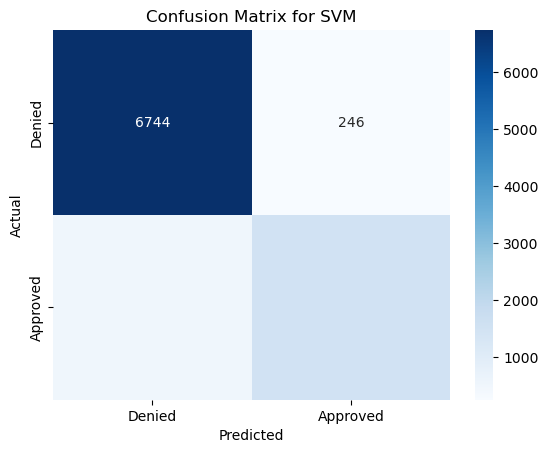

In [50]:
# Use the best model
best_svc = random_search.best_estimator_

# Make predictions
y_pred = best_svc.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

# **Loan Classification Project Analysis**

## **Key Highlights**
1. **Accuracy: 91.69%**
   - A strong result, the SVM model performs well overall.

2. **Class-Specific Performance:**
   - **Class 0 (Denied Loans):**
     - **Precision:** 93% (Very few false positives; excellent at identifying denied loans).
     - **Recall:** 96% (Most actual denials are correctly classified).
     - **F1-Score:** 95% (Balances precision and recall effectively).
   - **Class 1 (Approved Loans):**
     - **Precision:** 86% (Good, though slightly higher false positives compared to Class 0).
     - **Recall:** 75% (Misses about a quarter of actual approved loans).
     - **F1-Score:** 80% (Decent, but room for optimization).

3. **Confusion Matrix:**
   - **Class 0 (Denied Loans):** Correctly classified 6,744 out of 6,990 samples.
   - **Class 1 (Approved Loans):** Correctly classified 1,510 out of 2,010 samples.
   - **False Negatives (Class 1):** 510 missed approvals, which might be critical depending on the context.

4. **Best Hyperparameters:**
   - **C:** 7.63 (Good control over decision boundary flexibility).
   - **Gamma:** 0.032 (Optimal balance between underfitting and overfitting).
   - **Kernel:** RBF (Appropriate choice for non-linear decision boundaries).
---
